# 项目简介

# 调包区

In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

# 警告忽略
import warnings
warnings.filterwarnings("ignore")

# matplotlib字体设置
plt.rcParams["font.family"] = "Songti SC"
plt.rcParams["axes.unicode_minus"] = False

# matplotlib警告忽略
pd.plotting.register_matplotlib_converters()


# 观看Dataframe长度
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
# 浮点数位长度
pd.set_option('display.precision',5)

# 可视化
import statsmodels.api as sm

# 显示多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # ['all', 'last', 'last_expr', 'none', 'last_expr_or_assign']

# 时间序列工具包

In [156]:
from fbprophet import Prophet

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import pmdarima as pm
import time
import datetime



class single_pic():
    def __pic_test__(self,Title,Text,result,color,ax):
        if ax == None:
            # 绘制文本（左上角注释）
            plt.text(0,0.7,Text, size=15) # 坐标.3。4较为居中，文字内容，大小

            # 绘制盖章 (居中或右下角)
            angle = 30
            plt.text(0.3, 0.33, result, rotation=angle, c=color, size=30)

            plt.gca().add_patch(plt.Rectangle((0.3, 0.2), 0.5, 0.3, fill=True, color=color,lw=5, angle=angle, alpha=0.5))

            plt.title(Title)

            plt.show()
        else:
            # 绘制文本（左上角注释）
            ax.text(0, 0.7, Text, size=15)  # 坐标.3。4较为居中，文字内容，大小

            # 绘制盖章 (居中或右下角)
            angle = 30
            ax.text(0.3, 0.33, result, rotation=angle, c=color, size=30)

            ax.add_patch(
                plt.Rectangle((0.3, 0.2), 0.5, 0.3, fill=True, color=color, lw=5, angle=angle, alpha=0.5))

            ax.set_title(Title)




    def pic_data_mean_std(self,df,ax=None):
        # 设置滑动窗口大小，默认为序列长度的1/10
        window_size = int(df.shape[0]/10)

        # 建立窗口
        window = df.rolling(window_size)

        # 计算滑动窗口均值
        window_mean = window.mean()

        # 计算滑动窗口方差
        window_std = window.std()

        if ax == None:
            # 绘制滑动窗口均值
            plt.plot(window_mean,label="均值",alpha=0.3)

            # 绘制滑动窗口方差
            plt.plot(window_std, label="方差",alpha=0.3)

            # 绘制走势图
            df.plot(label="观测值",alpha=0.3)

            # 设置标签
            plt.title("观测值、均值、方差")

            # 去除x标签
            plt.xticks(()) # 关闭x轴的刻度值

            # 显示图例
            plt.legend()

            # 显示图像
            plt.show()

        else:
            # 绘制滑动窗口均值
            ax.plot(window_mean, label="均值")

            # 绘制滑动窗口方差
            ax.plot(window_std, label="方差")

            # 绘制走势图
            ax.plot(df,label="观测值")

            # 设置标签
            ax.set_title("观测值、均值、方差")

            # 去除x标签
            ax.set_xticks(()) # 关闭x轴的刻度值

            # 显示图例
            ax.legend()


    def pic_acf_pacf(self,df,acf_ax=None,pacf_ax=None):
        if (acf_ax and pacf_ax) == None:
            # 展开子图
            fig,ax = plt.subplots(1,2) # 打开子图，使用1行2列

            # 绘制自相关系数，占用第一子图
            plot_acf(df,ax=ax[0])
            ax[0].set_title("自相关系数")

            # 绘制偏自相关系数，占用第二子图
            plot_pacf(df,ax=ax[1])
            ax[1].set_title("偏自相关系数")

            # 展示图画
            plt.show()

        else:
            # 绘制自相关系数，占用第一子图
            plot_acf(df, ax=acf_ax)
            acf_ax.set_title("自相关系数")

            # 绘制偏自相关系数，占用第二子图
            plot_pacf(df, ax=pacf_ax)
            pacf_ax.set_title("偏自相关系数")



    # ADF检验
    def pic_adf(self, df, ax=None):
        # 建立标题
        Title = "ADF检验"

        # 建议原假设、备则假设
        H0 = "非平稳序列"
        H1 = "平稳序列"
        pvalue = adfuller(df)[1]

        if pvalue > 0.05:
            result = H0
            color = "g"
        elif pvalue < 0.05:
            result = H1
            color = "r"

        Text = "\n{}:\n原假设：{}\n备则假设：{}\nP-Value = {}\n检测结果:{}".format(Title,H0,H1,pvalue,result)

        print(Text)

        # 绘制文本 与 绘制盖章
        self.__pic_test__(Title,Text,result,color,ax)

    def pic_kpss(self, df, ax=None):
        # 建立标题
        Title = "KPSS检测"

        # 建立原假设、备则假设
        H0 = "平稳序列"
        H1 = "非平稳序列"

        # 测试
        kpss = pm.arima.KPSSTest()
        diff_test = kpss.should_diff(df)
        pvalue = diff_test[0]
        diff_result = diff_test[1]  # 是否需要查分

        if diff_result == False:
            result = H0
            color = "r"
        elif diff_result == True:
            result = H1
            color = "g"

        Text = "\n{}:\n原假设：{}\n备则假设：{}\nP-Value = {}\n检测结果:{}".format(Title, H0, H1, pvalue, result)

        print(Text)

        # 绘制文本 与 绘制盖章
        self.__pic_test__(Title,Text,result,color,ax)

    # PP检验
    def pic_pp(self, df, ax=None):
        # 建立标题
        Title = "PP检验"

        # 建议原假设、备则假设
        H0 = "非平稳序列"
        H1 = "平稳序列"

        pp = pm.arima.PPTest()
        diff_test = pp.should_diff(df)
        pvalue = diff_test[0]
        diff_result = diff_test[1]  # 是否需要查分

        if diff_result == False:
            result = H1
            color = "r"
        elif diff_result == True:
            result = H0
            color = "g"

        Text = "\n{}:\n原假设：{}\n备则假设：{}\nP-Value = {}\n检测结果:{}".format(Title,H0,H1,pvalue,result)
        print(Text)

        # 绘制文本 与 绘制盖章
        self.__pic_test__(Title,Text,result,color,ax)


    # 检测周期性
    def pic_ocsb(self, df, ax=None):
        # 建立标题
        Title = "OCSB检验"

        m = 12
        ch = pm.arima.CHTest(m)
        H0 = "存在周期性"
        H1 = "不存在周期性"
        test_result = ch.estimate_seasonal_differencing_term(df)

        if test_result > 0:
            result = H0
            color = "g"

        elif test_result == 0:
            result = H1
            color = "r"

        Text = "\n{}:\n原假设：{}\n备则假设：{}\n需要差分阶级 = {}\n检测结果:{}".format(Title,H0,H1,test_result,result)
        print(Text)

        # 绘制文本 与 绘制盖章
        self.__pic_test__(Title,Text,result,color,ax)

    # LB检测
    def pic_lp_bp(self, df, lb3_ax=None, lb6_ax=None, bp3_ax=None, bp6_ax=None):
        # 设置原假设与备则假设
        H0 = "纯随序列"
        H1 = "非纯随序列"
        test_result = acorr_ljungbox(df, lags=[3, 6], boxpierce=True, return_df=True)

        lb_pvalue_3 = test_result.loc[3, "lb_pvalue"]
        lb_pvalue_6 = test_result.loc[3, "lb_pvalue"]
        bp_pvalue_3 = test_result.loc[6, "bp_pvalue"]
        bp_pvalue_6 = test_result.loc[6, "bp_pvalue"]

        if (lb3_ax and lb6_ax and bp3_ax and bp6_ax) == None:
            shape = (2, 2)
            lb3_ax = plt.subplot2grid(shape, (0, 0))
            lb6_ax = plt.subplot2grid(shape, (0, 1))
            bp3_ax = plt.subplot2grid(shape, (1, 0))
            bp6_ax = plt.subplot2grid(shape, (1, 1))

        pvalue_list = [lb_pvalue_3, lb_pvalue_6, bp_pvalue_3, bp_pvalue_6]
        name_list = ["LB检测3阶", "LB检测6阶", "BP检测3阶", "BP检测6阶"]
        ax_list = [lb3_ax, lb6_ax, bp3_ax, bp6_ax]

        for p_value, Title, ax in zip(pvalue_list, name_list, ax_list):
            if p_value > 0.05:
                result = H0
                color = "r"

            elif p_value < 0.05:
                result = H1
                color = "g"

            Text = "\n{}:\n原假设：{}\n备则假设：{}\nP_value = {}\n检测结果:{}".format(Title, H0, H1, p_value, result)
            print(Text)

            self.__pic_test__(Title, Text, result, color, ax)

        if (lb3_ax and lb6_ax and bp3_ax and bp6_ax) == None:
            plt.show()


    # 自相关系数图（少阶、多阶）
    def pic_acf_more_less(self,df, acf_less_ax=None, acf_more_ax=None):
        if (acf_less_ax and acf_more_ax) == None:
            # 展开子图
            shape = (1, 2)
            acf_less_ax = plt.subplot2grid(shape, (0, 0))
            acf_more_ax = plt.subplot2grid(shape, (0, 1))

        # 绘制少阶自相关系数，占用第一子图
        plot_acf(df, ax=acf_less_ax)
        acf_less_ax.set_title("自相关系数(少阶)")

        # 绘制多阶自相关系数，占用第一子图
        pd.plotting.autocorrelation_plot(df, ax=acf_more_ax)
        plt.title("自相关系数(多阶)")

        if (acf_less_ax and acf_more_ax) == None:
            # 展示图画
            plt.show()

class combine_pic(single_pic):
    def ts_stable_pic(self,df,SHOW=False):
        plt.figure(figsize=(15,20))
        shape = (4,2)
        data_mean_std_ax = plt.subplot2grid(shape, (0, 0), colspan=2)  # 自定子图位置的函数，参数为：总体分布情况，子图位置，单图占据位置
        acf_ax = plt.subplot2grid(shape, (1, 0))
        pacf_ax = plt.subplot2grid(shape, (1, 1))
        adf_ax = plt.subplot2grid(shape, (2, 0))
        kpss_ax = plt.subplot2grid(shape, (2, 1))
        pp_ax = plt.subplot2grid(shape, (3, 0))
        ocsb_ax = plt.subplot2grid(shape, (3, 1))


        #观察走势图、划动窗口均值、方差
        self.pic_data_mean_std(df,ax=data_mean_std_ax)

        #观察自相关系数、偏子相关系数
        self.pic_acf_pacf(df,acf_ax,pacf_ax)

        # ADF检验
        self.pic_adf(df,ax=adf_ax)

        # KPSS检验
        self.pic_kpss(df,ax=kpss_ax)

        # PP检验
        self.pic_pp(df,ax=pp_ax)

        # 检测周期性
        self.pic_ocsb(df,ax=ocsb_ax)

        # 保存图片
        plt.savefig('./平稳检测.png'.format(time.time()))

        if SHOW == True:
            plt.show()

    def ts_random_pic(self,df,SHOW=False):
        plt.figure(figsize=(15, 20))
        shape = (4,2)
        data_mean_std_ax = plt.subplot2grid(shape, (0, 0), colspan=2)
        acf_less_ax = plt.subplot2grid(shape, (1, 0))
        acf_more_ax = plt.subplot2grid(shape, (1, 1))
        lb3_ax = plt.subplot2grid(shape, (2, 0))
        lb6_ax = plt.subplot2grid(shape, (2, 1))
        bp3_ax = plt.subplot2grid(shape, (3, 0))
        bp6_ax = plt.subplot2grid(shape, (3, 1))

        # 趋势图
        self.pic_data_mean_std(df,ax=data_mean_std_ax)

        # 自相关系数图（少阶、多阶）
        self.pic_acf_more_less(df, acf_less_ax=acf_less_ax, acf_more_ax=acf_more_ax)

        # # LB检测
        self.pic_lp_bp(df, lb3_ax=lb3_ax, lb6_ax=lb6_ax, bp3_ax=bp3_ax, bp6_ax=bp6_ax)

        # 保存图片
        plt.savefig('./随机检测.png'.format(time.time()))

        if SHOW == True:
            plt.show()

class metric():
    def keras_r2(self,y_true, y_pred):
        import tensorflow.keras.backend as K
        y_mean = K.mean(y_true)
        # ssreg=K.sum((y_pred-y_mean)**2)
        sstotal = K.sum((y_true - y_mean) ** 2)
        ssres = K.sum((y_true - y_pred) ** 2)
        score = 1 - (ssres / sstotal)
        return score
            
class ts_tools():
    def diff_check(self,df):
        # 趋势差分
        print("趋势差分检测")
        print("adf",pm.arima.ndiffs(df,test="adf"))
        print("kpss",pm.arima.ndiffs(df, test="kpss"))
        print("pp",pm.arima.ndiffs(df, test="pp"))
        # 周期性差分 目前存在bug
#         print("周期性差分检测") 
#         for i in range(0,df.shape[0]):
#             if (pm.arima.nsdiffs(df,m=10,test="ch") or pm.arima.nsdiffs(df, m=10, test="ocsb")) > 0:
#                 print(i)

    def tsdata_to_traindata(self,ts_data,x_size,y_size):
        '''
        x_size = 5
        y_size = 1
        ts_data = df["Count"]
        date_x,date_y,date_tip = tsdata_to_traindata(ts_data,x_size,y_size)

        date_x
        date_y
        date_tip
        '''
        from tqdm.notebook import tqdm
        # 得到所有Y值
        y_list = ts_data.to_list()
        # 得到所有日期
        date_list = ts_data.index.tolist()

        # 得到Y的长度
        y_count = len(y_list)

        feature_list = []
        label_list = []
        index_list = []
        index_tip_list = []

        for i in tqdm(range(y_count)):
            feature_start = i
            feature_end = i+x_size
            label_start = feature_end
            label_end = label_start + y_size

            if feature_end<=y_count:
                # 生成特征
                feature = y_list[feature_start : feature_end]
                feature_list.append(feature)
                # 生成标签
                label = y_list[label_start : label_end]
                label_list.append(label)
                # 生成日期索引
                start_date = df.index[i]
                end_date = start_date+datetime.timedelta(days=x_size)
                date_range_str = str(start_date)[:10]+" to "+str(end_date)[:10]
                index_list.append(end_date)
                index_tip_list.append(date_range_str)

            else:
                break

        # 生成对应的DataFrame
        date_x = pd.DataFrame(feature_list,index=index_list,columns=[f"date_{i}" for i in range(x_size)])
        date_y = pd.DataFrame(label_list,index=index_list,columns=["y"])
        date_tip = pd.DataFrame(index_tip_list,index=index_list,columns=["tip"])


        return date_x,date_y,date_tip

        

    def tsdata_to_traindata_multi(self,ts_data,label_columns):    
        '''
        ts_data 为多元时间序列的原始数据
        label_columns 为标签名称
        date_x,date_y = tsdata_to_traindata_multi(ts_data,label_columns)
        date_x
        date_y
        '''
        date_x = ts_data
        date_y = date_x[[label_columns]].shift(-1).rename(columns={label_columns:"y"})

        return date_x,date_y

    def predict_mlts(self,model,date_x,pred_day,dimension=2,freq="D"):
        '''
        model 训练好用于预测的模型
        date_x 原始未切分，没有进行维度转化，带时间索引的DF，因为预测的起点日期与起点数据要从这个数据集里面取
        pred_day  预测的天数
        dimension 训练集的维度，LSTM为3维，普通模型为2维
        freq="D"  定义时间的频率（工作日还是正常日）
        
        pred_df = predict_mlts(model,date_x,pred_day,dimension,freq)
        pred_df
        '''
        
        from tqdm.notebook import tqdm

        # 初始化设置
        pred_date_list = [] # 初始日期列表 
        pred_value_list = []# 初始预测列表
        date_feature = date_x.iloc[-1].tolist() # 初始数据集（最后一天的数据集）
        feature_count = len(date_feature)
        date_date = date_x.iloc[[-1]].index # 初始日期（开始日期）
        date_date.freq = freq # 定义时间的频率（工作日还是正常日）

        # for循环（预测的天数）
        for i in tqdm(range(pred_day)):
            # 得到日期与数据集
            date_date = date_date + datetime.timedelta(days=1)    # 得到当天日期 初始日期+i
            this_time_feature = date_feature[-feature_count:]# 得到当天的数据集 ,只取最后最新的几个

            # 数据格式的转化，因为LSTM会用到三维数据，其他模型用二维数据
            if dimension==2:    ### 转化为二维数据
                this_time_feature = np.array(this_time_feature).reshape(-1,feature_count)
            elif dimension==3:    ### 转化为三维数据
                this_time_feature = np.array(this_time_feature).reshape(-1,1,feature_count)

            # 得到当天预测值
            pred_y = model.predict(this_time_feature).flatten().flatten()[0] # 将结果还原为1维数据

            # 内容更新
            date_feature.append(pred_y)     # 更新数据集，用于之后提取最新的数据集
            pred_date_list.append(date_date[0]) # 将日期保存到日期列表
            pred_value_list.append(pred_y)# 将预测结果保存到预测表

        # 生成结果
        pred_df = pd.DataFrame(pred_value_list,columns=["pred_y"],index=pred_date_list)
        return pred_df
        

class modeltools():
    def pic_predict_test(self,test_data,hat,ci=None):
        # 绘制测试集
        test_data.plot(label="测试集",marker="o")

        # 绘制预测值
        pd.Series(hat,index=test_data.index).plot(label="预测值",marker="o")

        # 绘制置信区间
        try:
            x_label = test_data.index
            up_area = ci[:,0]
            down_area = ci[:,1]

            plt.fill_between(x_label,up_area,down_area,color="green",alpha=0.2)
        except Exception:
            pass

        # 打开说明板
        plt.legend()

        # 展示
        plt.show()


class mytstools(combine_pic,modeltools,ts_tools,metric):
    pass

ts = mytstools() # 实例化

# 资金流入流出预测

## 打开文件

In [3]:
# 打开文件
path = "./data"

path_list = [f"{path}/mfd_bank_shibor.csv",
            f"{path}/mfd_day_share_interest.csv",
            f"{path}/user_balance_table.csv",
            f"{path}/user_profile_table.csv"
           ]

name_list = range(len(path_list))

data = {}
for name,path in zip(name_list,path_list):
    data[name] = pd.read_csv(path)
    
data[0]
data[1]
data[2]
data[3]

,mfd_date,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y
0,20130701,4.456,5.423,6.0400,6.8800,5.2950,4.2390,4.2820,4.4125
1,20130702,3.786,4.750,5.0740,5.8000,5.2110,4.2344,4.2808,4.4070
2,20130703,3.400,4.242,4.6580,5.2000,5.1480,4.2300,4.2796,4.4022
3,20130704,3.348,3.938,4.4640,5.1020,5.0290,4.2287,4.2776,4.4000
4,20130705,3.380,3.816,4.2950,4.7885,4.9390,4.2273,4.2749,4.4000
...,...,...,...,...,...,...,...,...,...
289,20140825,2.841,3.363,3.8860,4.1990,4.6758,4.8800,4.9394,5.0000
290,20140826,2.823,3.318,3.8760,4.2000,4.6695,4.8730,4.9363,5.0000
291,20140827,2.861,3.349,3.9828,4.1780,4.6680,4.8729,4.9365,5.0000
292,20140828,2.876,3.538,4.0500,4.1330,4.6689,4.8727,4.9373,5.0000


,mfd_date,mfd_daily_yield,mfd_7daily_yield
0,20130701,1.5787,6.307
1,20130702,1.5461,6.174
2,20130703,1.4670,6.034
3,20130704,1.4223,5.903
4,20130705,1.3845,5.739
...,...,...,...
422,20140827,1.1079,4.123
423,20140828,1.1043,4.116
424,20140829,1.1169,4.123
425,20140830,1.1206,4.134


,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,20140825,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,20140831,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,20140724,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,20140727,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


,user_id,sex,city,constellation
0,2,1,6411949,狮子座
1,12,1,6412149,摩羯座
2,22,1,6411949,双子座
3,23,1,6411949,双鱼座
4,25,1,6481949,双鱼座
...,...,...,...,...
28036,28017,0,6412149,摩羯座
28037,28018,0,6411949,摩羯座
28038,28022,1,6081949,双鱼座
28039,28034,1,6301949,天蝎座


In [158]:
# 定义数据集
df = data[2]
df

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,20140825,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,20140831,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,20140724,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,20140727,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [159]:
# 截取目标数据
target_list = ["report_date","total_purchase_amt","total_redeem_amt"]
df = df[target_list]
df

,report_date,total_purchase_amt,total_redeem_amt
0,20140805,2,0
1,20140808,2,0
2,20140811,2,0
3,20140814,2,0
4,20140817,2,0
...,...,...,...
2840416,20140825,61,0
2840417,20140831,60,12500
2840418,20140724,2297,0
2840419,20140727,2298,31732


## 数据检查

### 缺失值检查

In [160]:
df.isnull().sum()

report_date           0
total_purchase_amt    0
total_redeem_amt      0
dtype: int64

### 重复值检查

In [161]:
all_columns = df.columns

for i in all_columns:
    print(i,df[i].duplicated().sum())
    

report_date 2839994
total_purchase_amt 2725083
total_redeem_amt 2758276


### 结论

### 数据清洗、格式处理

In [162]:

# 时间格式的转化
df["report_date"] = pd.to_datetime(df["report_date"],format="%Y%m%d")

# 进行以天为单位的聚合
total_balance = df.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()

# 提取数据
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
purchase
redeem

,total_purchase_amt
report_date,
2013-07-01,32488348
2013-07-02,29037390
2013-07-03,27270770
2013-07-04,18321185
2013-07-05,11648749
...,...
2014-08-27,302194801
2014-08-28,245082751
2014-08-29,267554713


,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


## 时间序列数据观察

### 数据趋势可视化

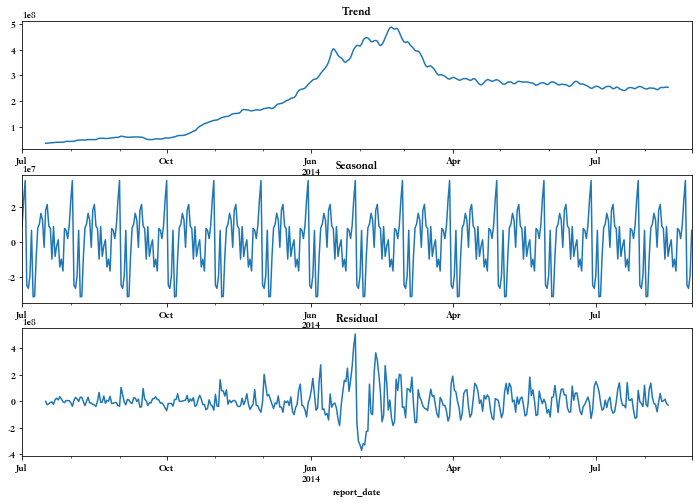

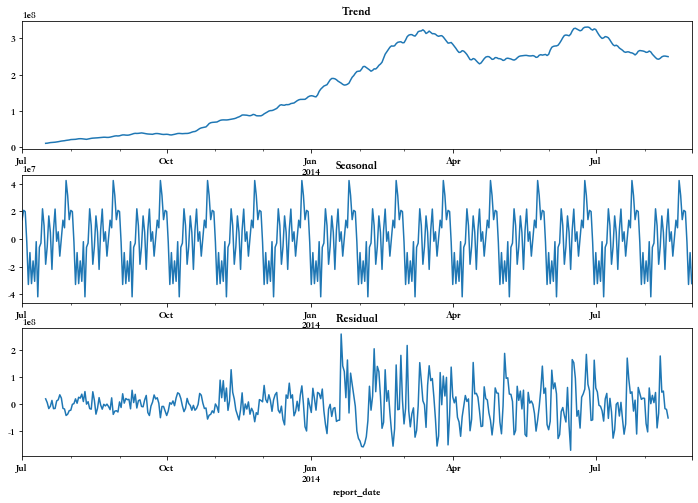

In [163]:
# 对指定范围的数据进行可视化
def plot_stl(data):
    # 将数据分成3个component:trend(趋势)seasonal(季节);residual(残差)
    result = sm.tsa.seasonal_decompose(data,freq=30)
    # 可视化
    fig= plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1,title='Trend')
    result.seasonal.plot(ax=ax2,title='Seasonal')
    result.resid.plot(ax=ax3,title='Residual')
    
plot_stl(purchase['total_purchase_amt'] )
plot_stl(redeem['total_redeem_amt'] )

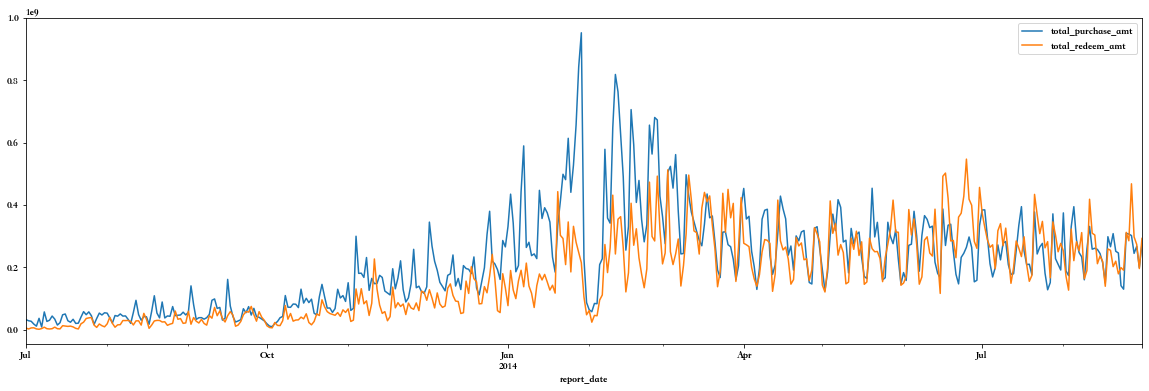

In [164]:
# 时间序列的平稳性
total_balance.plot(figsize=(20,6))
plt.show()

### 平稳性检查

purchase的平稳性检验

ADF检验:
原假设：非平稳序列
备则假设：平稳序列
P-Value = 0.4886749751375929
检测结果:非平稳序列

KPSS检测:
原假设：平稳序列
备则假设：非平稳序列
P-Value = 0.01
检测结果:非平稳序列

PP检验:
原假设：非平稳序列
备则假设：平稳序列
P-Value = 0.01
检测结果:平稳序列

OCSB检验:
原假设：存在周期性
备则假设：不存在周期性
需要差分阶级 = 0
检测结果:不存在周期性


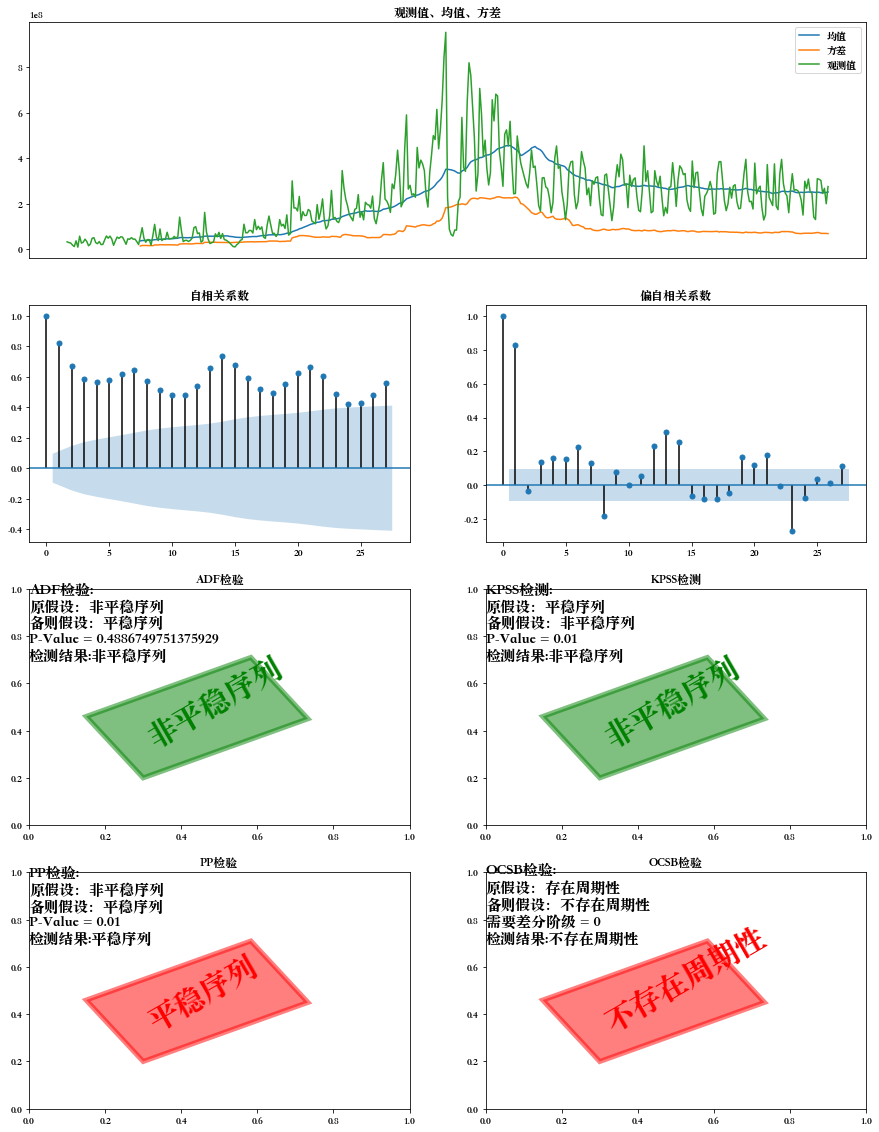

In [165]:
print("purchase的平稳性检验")
ts.ts_stable_pic(purchase) # 平稳性检查函数

### 随机性检查


LB检测3阶:
原假设：纯随序列
备则假设：非纯随序列
P_value = 1.9497437155178955e-152
检测结果:非纯随序列

LB检测6阶:
原假设：纯随序列
备则假设：非纯随序列
P_value = 1.9497437155178955e-152
检测结果:非纯随序列

BP检测3阶:
原假设：纯随序列
备则假设：非纯随序列
P_value = 1.5612210127184919e-276
检测结果:非纯随序列

BP检测6阶:
原假设：纯随序列
备则假设：非纯随序列
P_value = 1.5612210127184919e-276
检测结果:非纯随序列


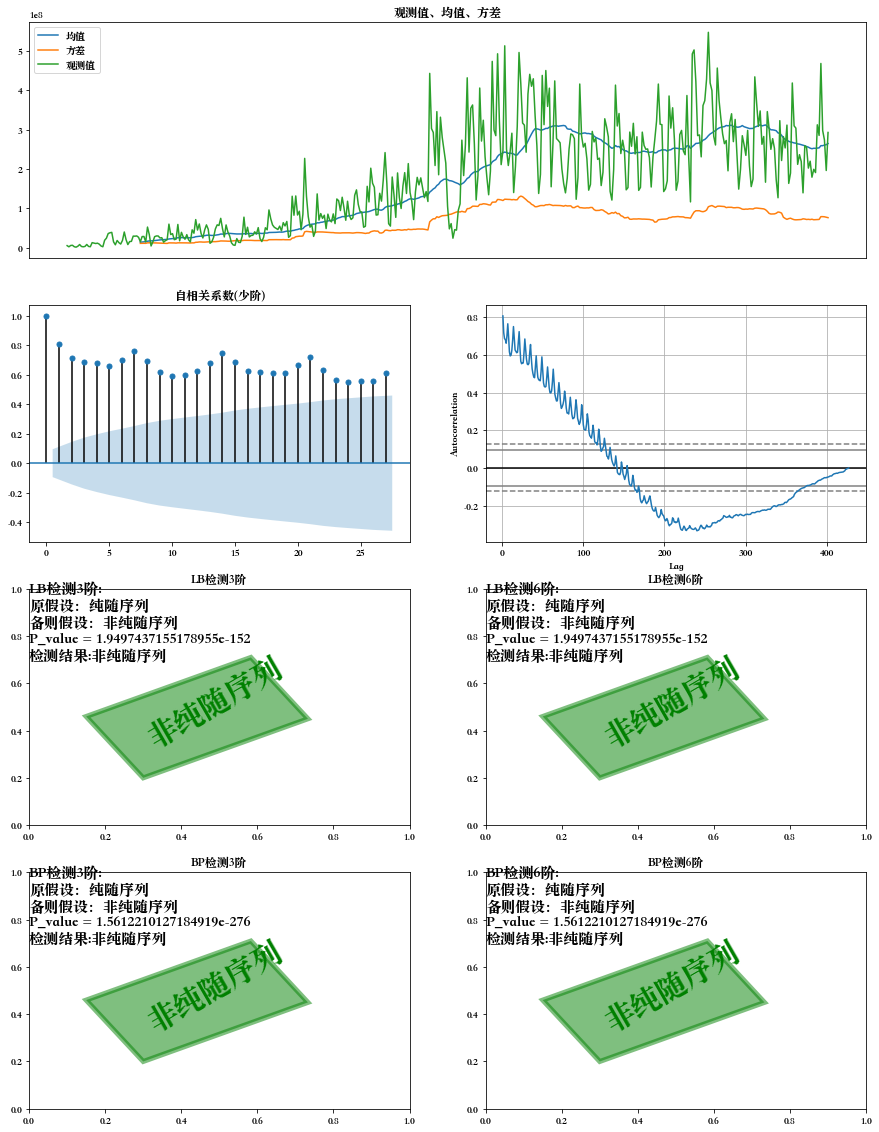

In [168]:
ts.ts_random_pic(redeem) # 随机性检查函数

### 观察结果

## 使用ARIMA模型进行预测

### 定阶

In [169]:
import itertools # 遍历工具，# 生成N个组合结果列表
from statsmodels.tsa.arima_model import ARIMA # ARMA、ARIMA建模
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tqdm.notebook import tqdm

# purchase
# redeem

# 数据切分
arima_params = itertools.product(range(7), [1], range(7))  # 生成N个组合结果列表

# 预设参数
best_redeem_aic = np.inf
best_redeem_aic_parmas = None
best_redeem_aic_result = None

best_purchase_aic = np.inf
best_purchase_aic_parmas = None
best_purchase_aic_result = None

for i in tqdm(list(arima_params)):
    try:
        # 建立模型
        redeem_model = ARIMA(redeem, order=i)
        purchase_model = ARIMA(purchase, order=i)

        # 模型拟合
        redeem_result = redeem_model.fit()
        purchase_result = purchase_model.fit()

        # 获得 aic 分数
        redeem_aic_score = redeem_result.aic
        purchase_aic_score = purchase_result.aic

        # 如果小于当前值
        if redeem_aic_score < best_redeem_aic:
            best_redeem_aic = redeem_aic_score  # 覆盖最优值
            best_redeem_aic_parmas = i  # 覆盖相关参数
            best_redeem_aic_result = redeem_result  # 记录相关结果

        # 如果小于当前值
        if purchase_aic_score < best_purchase_aic:
            best_purchase_aic = purchase_aic_score  # 覆盖最优值
            best_purchase_aic_parmas = i  # 覆盖相关参数
            best_purchase_aic_result = purchase_result  # 记录相关结果
            
    except Exception:
        pass

# 打印最优aic，相关参数，结果
print("最优purchase_aic：{}，对应参数为：{}".format(best_purchase_aic, best_purchase_aic_parmas))
print("最优redeem_aic：{}，对应参数为：{}".format(best_redeem_aic, best_redeem_aic_parmas))



  0%|          | 0/49 [00:00<?, ?it/s]

最优purchase_aic：16674.1209060314，对应参数为：(6, 1, 5)
最优redeem_aic：16489.022767291874，对应参数为：(6, 1, 5)


### 建模 预测 ( 进行未来1个月预测 )

In [170]:
# 封装 进行ARIMA建模 预测
def ARIMA_pred_y(data,best_ord):
    # 建立模型
    model = ARIMA(data,best_ord)

    # 模型拟合
    result = model.fit()

    # 预测
    pred_y = result.predict('2014-09-01','2014-09-30',typ ='levels')
    
    return pred_y

purchase_pred = ARIMA_pred_y(purchase, best_ord = (6,1,5))
redeem_pred = ARIMA_pred_y(redeem, best_ord = (6,1,5))


### 观察预测效果

观察拟合效果：


Text(0.5, 1.0, '整体拟合效果')

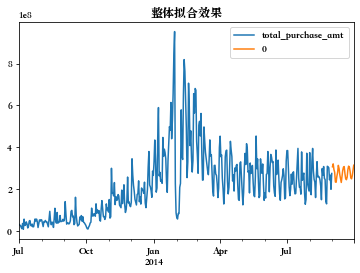

In [171]:
# 观察拟合效果
print("观察拟合效果：")

# 绘制真实值与预测值的对比图
compare_df = pd.concat([purchase,purchase_pred],axis=1)
compare_df.plot()
plt.title("整体拟合效果")
plt.show()

### 生成提交数据

In [172]:
#购买、赎回 数据合并
result = pd.DataFrame()
result['report_date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values

#将日期类型转换为YYYYMMDD
result['report_date']=result['report_date'].apply(lambda x:str(x).replace('-','')[:8])
result

#保存文件
result.to_csv('tsa_ARMIA_base.csv',header=None,index=None)


,report_date,purchase,redeem
0,20140901,3.07446e+08,3.28217e+08
1,20140902,3.21103e+08,3.41718e+08
2,20140903,2.93940e+08,3.28136e+08
3,20140904,2.81367e+08,3.29142e+08
4,20140905,2.34404e+08,2.67739e+08
...,...,...,...
25,20140926,2.54596e+08,2.76645e+08
26,20140927,2.49875e+08,2.21402e+08
27,20140928,2.64830e+08,2.58187e+08
28,20140929,2.91139e+08,3.23313e+08


## 使用prophet模型

### 使用方法

### 得到Prophet的时间序列数据

In [173]:
prophet_data = df.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum() 
prophet_data['ds'] = prophet_data.index
prophet_data

,total_purchase_amt,total_redeem_amt,ds
report_date,,,
2013-07-01,32488348,5525022,2013-07-01
2013-07-02,29037390,2554548,2013-07-02
2013-07-03,27270770,5953867,2013-07-03
2013-07-04,18321185,6410729,2013-07-04
2013-07-05,11648749,2763587,2013-07-05
...,...,...,...
2014-08-27,302194801,468164147,2014-08-27
2014-08-28,245082751,297893861,2014-08-28
2014-08-29,267554713,273756380,2014-08-29


In [174]:
# 提取purchase 和 redeem
purchase = prophet_data[['ds','total_purchase_amt']].rename(columns={'total_purchase_amt':'y'}) 
redeem = prophet_data[['ds','total_redeem_amt']].rename(columns={'total_redeem_amt':'y'}) 
purchase.head()
redeem.head()

,ds,y
report_date,,
2013-07-01,2013-07-01,32488348
2013-07-02,2013-07-02,29037390
2013-07-03,2013-07-03,27270770
2013-07-04,2013-07-04,18321185
2013-07-05,2013-07-05,11648749


,ds,y
report_date,,
2013-07-01,2013-07-01,5525022
2013-07-02,2013-07-02,2554548
2013-07-03,2013-07-03,5953867
2013-07-04,2013-07-04,6410729
2013-07-05,2013-07-05,2763587


In [175]:
# 因为数据可视化过程中发现 purchase 在2014-4前数据有明显的波动，后面稳定
#                      redeem 在2014-2前数据有明显的波动，后面稳定
# 尝试测试只使用部分数据进行训练
purchase = purchase[purchase.index >= '2014-04-01']
redeem = redeem[redeem.index >= '2014-02-01']

### 构建模型

In [176]:

# 拟合模型
p_model = Prophet(weekly_seasonality = True,yearly_seasonality=False,daily_seasonality=False)
r_model = Prophet(weekly_seasonality = True,yearly_seasonality=False,daily_seasonality=False)

p_model.fit(purchase)
r_model.fit(redeem)

p_future = p_model.make_future_dataframe(periods=30)
r_future = r_model.make_future_dataframe(periods=30)

p_forecast = p_model.predict(p_future)
r_forecast = r_model.predict(r_future)

p_forecast
r_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,2.87287e+08,2.67430e+08,4.07315e+08,2.87287e+08,2.87287e+08,5.19709e+07,5.19709e+07,5.19709e+07,5.19709e+07,5.19709e+07,5.19709e+07,0.0,0.0,0.0,3.39258e+08
1,2014-04-02,2.86995e+08,2.68751e+08,4.05535e+08,2.86995e+08,2.86995e+08,4.82667e+07,4.82667e+07,4.82667e+07,4.82667e+07,4.82667e+07,4.82667e+07,0.0,0.0,0.0,3.35262e+08
2,2014-04-03,2.86703e+08,2.57863e+08,3.86939e+08,2.86703e+08,2.86703e+08,3.71928e+07,3.71928e+07,3.71928e+07,3.71928e+07,3.71928e+07,3.71928e+07,0.0,0.0,0.0,3.23896e+08
3,2014-04-04,2.86411e+08,1.95274e+08,3.24048e+08,2.86411e+08,2.86411e+08,-2.45770e+07,-2.45770e+07,-2.45770e+07,-2.45770e+07,-2.45770e+07,-2.45770e+07,0.0,0.0,0.0,2.61834e+08
4,2014-04-05,2.86120e+08,1.42884e+08,2.73424e+08,2.86120e+08,2.86120e+08,-8.03823e+07,-8.03823e+07,-8.03823e+07,-8.03823e+07,-8.03823e+07,-8.03823e+07,0.0,0.0,0.0,2.05737e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2014-09-26,2.35328e+08,1.43619e+08,2.72976e+08,2.35328e+08,2.35328e+08,-2.45770e+07,-2.45770e+07,-2.45770e+07,-2.45770e+07,-2.45770e+07,-2.45770e+07,0.0,0.0,0.0,2.10751e+08
179,2014-09-27,2.35036e+08,8.93566e+07,2.17636e+08,2.35036e+08,2.35036e+08,-8.03823e+07,-8.03823e+07,-8.03823e+07,-8.03823e+07,-8.03823e+07,-8.03823e+07,0.0,0.0,0.0,1.54653e+08
180,2014-09-28,2.34744e+08,9.75550e+07,2.24506e+08,2.34744e+08,2.34744e+08,-7.53909e+07,-7.53909e+07,-7.53909e+07,-7.53909e+07,-7.53909e+07,-7.53909e+07,0.0,0.0,0.0,1.59353e+08
181,2014-09-29,2.34452e+08,2.13580e+08,3.42289e+08,2.34452e+08,2.34452e+08,4.29198e+07,4.29198e+07,4.29198e+07,4.29198e+07,4.29198e+07,4.29198e+07,0.0,0.0,0.0,2.77372e+08


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-02-01,2.47748e+08,5.82776e+07,2.50836e+08,2.47748e+08,2.47748e+08,-9.38547e+07,-9.38547e+07,-9.38547e+07,-9.38547e+07,-9.38547e+07,-9.38547e+07,0.0,0.0,0.0,1.53894e+08
1,2014-02-02,2.48297e+08,8.13651e+07,2.75630e+08,2.48297e+08,2.48297e+08,-6.67428e+07,-6.67428e+07,-6.67428e+07,-6.67428e+07,-6.67428e+07,-6.67428e+07,0.0,0.0,0.0,1.81554e+08
2,2014-02-03,2.48845e+08,2.19654e+08,4.27225e+08,2.48845e+08,2.48845e+08,7.41674e+07,7.41674e+07,7.41674e+07,7.41674e+07,7.41674e+07,7.41674e+07,0.0,0.0,0.0,3.23012e+08
3,2014-02-04,2.49394e+08,1.90903e+08,3.83355e+08,2.49394e+08,2.49394e+08,3.70320e+07,3.70320e+07,3.70320e+07,3.70320e+07,3.70320e+07,3.70320e+07,0.0,0.0,0.0,2.86426e+08
4,2014-02-05,2.49942e+08,1.86614e+08,3.90231e+08,2.49942e+08,2.49942e+08,4.01627e+07,4.01627e+07,4.01627e+07,4.01627e+07,4.01627e+07,4.01627e+07,0.0,0.0,0.0,2.90105e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2014-09-26,2.81229e+08,1.87603e+08,3.81187e+08,2.80362e+08,2.82025e+08,-4.22024e+06,-4.22024e+06,-4.22024e+06,-4.22024e+06,-4.22024e+06,-4.22024e+06,0.0,0.0,0.0,2.77009e+08
238,2014-09-27,2.81294e+08,8.16178e+07,2.88170e+08,2.80354e+08,2.82149e+08,-9.38547e+07,-9.38547e+07,-9.38547e+07,-9.38547e+07,-9.38547e+07,-9.38547e+07,0.0,0.0,0.0,1.87439e+08
239,2014-09-28,2.81359e+08,1.19988e+08,3.15793e+08,2.80370e+08,2.82266e+08,-6.67428e+07,-6.67428e+07,-6.67428e+07,-6.67428e+07,-6.67428e+07,-6.67428e+07,0.0,0.0,0.0,2.14616e+08
240,2014-09-29,2.81423e+08,2.53884e+08,4.55193e+08,2.80381e+08,2.82398e+08,7.41674e+07,7.41674e+07,7.41674e+07,7.41674e+07,7.41674e+07,7.41674e+07,0.0,0.0,0.0,3.55591e+08


### 观察拟合+预测效果（进行未来1个月的预测）

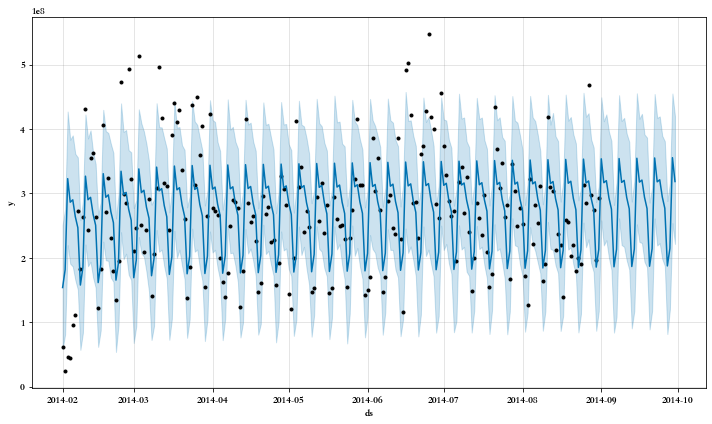

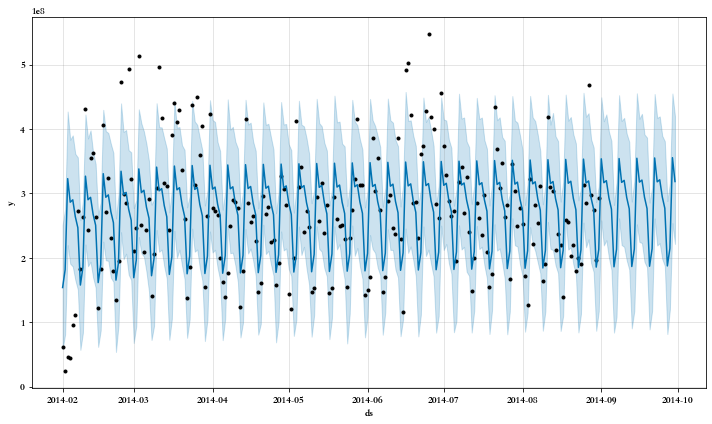

In [177]:
r_model.plot(r_forecast)

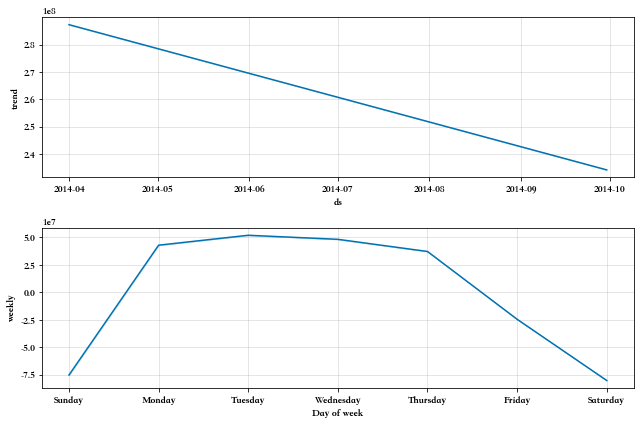

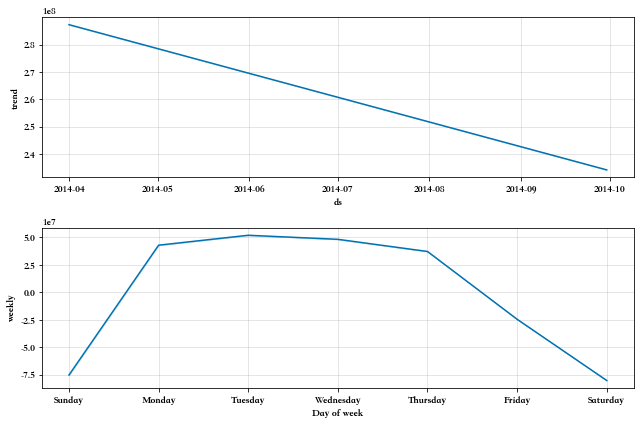

In [178]:
p_model.plot_components(p_forecast)

### 生成提交数据

In [179]:
result = pd.DataFrame()
result['report_date'] = p_forecast['ds'].tail(30).values
result['purchase'] = p_forecast['yhat'].tail(30).values
result['redeem'] = r_forecast['yhat'].tail(30).values

# 2014-09-01 --> 20140901 00:00:00 --> 20140901
result['report_date'] = result['report_date'].apply(lambda x: str(x).replace('-','')[:8])
result.to_csv('tsa_base_prophet.csv', header=None, index=None)


## 使用周期因子进行预测

### 数据准备

In [180]:
data = df.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum() 
data = data[data.index >= '2014-04-01']
data.reset_index(inplace = True)
data

,report_date,total_purchase_amt,total_redeem_amt
0,2014-04-01,453320585,277429358
1,2014-04-02,355347118,272612066
2,2014-04-03,363877120,266605457
3,2014-04-04,251895894,200192637
4,2014-04-05,202336542,163199682
...,...,...,...
148,2014-08-27,302194801,468164147
149,2014-08-28,245082751,297893861
150,2014-08-29,267554713,273756380
151,2014-08-30,199708772,196374134


In [181]:
def add_timestamp(data):
    data['report_date'] = pd.to_datetime(data['report_date'], format='%Y%m%d')
    data['day'] = data['report_date'].dt.day
    data['month'] = data['report_date'].dt.month
    data['year'] = data['report_date'].dt.year
    data['week'] = data['report_date'].dt.week
    
    data['weekday'] = data['report_date'].dt.weekday
    return data

total_balance = add_timestamp(data)
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
0,2014-04-01,453320585,277429358,1,4,2014,14,1
1,2014-04-02,355347118,272612066,2,4,2014,14,2
2,2014-04-03,363877120,266605457,3,4,2014,14,3
3,2014-04-04,251895894,200192637,4,4,2014,14,4
4,2014-04-05,202336542,163199682,5,4,2014,14,5
...,...,...,...,...,...,...,...,...
148,2014-08-27,302194801,468164147,27,8,2014,35,2
149,2014-08-28,245082751,297893861,28,8,2014,35,3
150,2014-08-29,267554713,273756380,29,8,2014,35,4
151,2014-08-30,199708772,196374134,30,8,2014,35,5


In [182]:
# 根据日历判断是否节假日
from chinese_calendar import is_workday, is_holiday
total_balance['is_holiday'] = total_balance['report_date'].apply(lambda x : is_holiday(x))
total_balance['is_holiday'] = total_balance['is_holiday'].replace({True:1,False:0})

# 判断周末是否和节假日冲出 发生补班状态
re_weekday = []
for index,(weekday,is_holiday) in enumerate(zip(total_balance['weekday'].values,total_balance['is_holiday'].values)):
    r = total_balance['weekday'].values[index]
     
    if weekday not in [5,6] and is_holiday ==1:
        r = 6
    elif weekday in [5,6] and is_holiday ==0:                        
        r = 0                                    
    re_weekday.append(r)
    
total_balance['weekday'] = re_weekday
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,is_holiday
0,2014-04-01,453320585,277429358,1,4,2014,14,1,0
1,2014-04-02,355347118,272612066,2,4,2014,14,2,0
2,2014-04-03,363877120,266605457,3,4,2014,14,3,0
3,2014-04-04,251895894,200192637,4,4,2014,14,4,0
4,2014-04-05,202336542,163199682,5,4,2014,14,5,1
...,...,...,...,...,...,...,...,...,...
148,2014-08-27,302194801,468164147,27,8,2014,35,2,0
149,2014-08-28,245082751,297893861,28,8,2014,35,3,0
150,2014-08-29,267554713,273756380,29,8,2014,35,4,0
151,2014-08-30,199708772,196374134,30,8,2014,35,5,1


### 计算周期因子

In [183]:
# 统计周一到周日的数据
weekday_weight = total_balance[['weekday','total_purchase_amt','total_redeem_amt']].groupby('weekday',as_index = False).mean()
weekday_weight.columns= ['weekday','purchase_weekday','redeem_weekday']

# 计算出每个周几 占比总数的权重
weekday_weight['purchase_weekday'] /= np.mean(total_balance['total_purchase_amt'])
weekday_weight['redeem_weekday'] /= np.mean(total_balance['total_redeem_amt'])

# 合并
total_balance = pd.merge(total_balance,weekday_weight,on='weekday',how='left')

# 计算出每个周一到周日在1-31号中出现的频次
weekday_count = total_balance[['report_date','day','weekday']].groupby(['day','weekday'],as_index = False).count()

weekday_count = pd.merge(weekday_count,weekday_weight,on='weekday')

# 通过一共出现几个月份 计算出每日因子
weekday_count['purchase_weekday'] = weekday_count['purchase_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))
weekday_count['redeem_weekday'] = weekday_count['redeem_weekday'] * weekday_count['report_date'] / len(np.unique(total_balance['month']))
day_rate = weekday_count.drop(['weekday','report_date'],axis = 1).groupby('day',as_index=False).sum()

# 每日的均值
day_mean = total_balance[['day','total_purchase_amt','total_redeem_amt']].groupby('day',as_index=False).mean()

day_base = pd.merge(day_mean,day_rate,on='day',how='left')

day_base['total_purchase_amt'] /= day_base['purchase_weekday']
day_base['total_redeem_amt'] /= day_base['redeem_weekday']

for index, row in day_base.iterrows():
    if row['day'] == 31: 
        break
    day_base.loc[index,'report_date'] = pd.to_datetime('2014/09/'+str(int(row['day'])))

day_base['weekday'] = day_base['report_date'].dt.weekday

day_pred = day_base[['total_purchase_amt','total_redeem_amt','report_date','weekday']]
day_pred = pd.merge(day_pred,weekday_weight,on='weekday')

day_pred['total_purchase_amt'] *= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] *= day_pred['redeem_weekday']

day_pred = day_pred.sort_values('report_date')


### 生成结果

In [197]:

result = pd.DataFrame()
result['report_date'] = day_pred.report_date
result['purchase'] = day_pred.total_purchase_amt
result['redeem'] = day_pred.total_redeem_amt

result['report_date'] = result['report_date'].apply(lambda x : str(x).replace('-','')[:8])

result.to_csv('tsa_day_base.csv',header=None,index=None)

In [198]:
result

,report_date,purchase,redeem
0,20140901,4.10058e+08,3.29798e+08
5,20140902,3.28371e+08,2.87001e+08
10,20140903,3.12243e+08,3.12766e+08
14,20140904,2.91644e+08,2.77685e+08
18,20140905,2.83688e+08,2.67381e+08
...,...,...,...
21,20140926,2.29826e+08,2.87052e+08
25,20140927,1.72851e+08,2.29477e+08
29,20140928,1.71531e+08,2.07295e+08
4,20140929,3.05741e+08,3.72356e+08


## 模型融合预测

### 数据准备

In [199]:
data = df.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum() 
data = data[data.index >= '2014-04-01']
data.reset_index(inplace = True)
data


,report_date,total_purchase_amt,total_redeem_amt
0,2014-04-01,453320585,277429358
1,2014-04-02,355347118,272612066
2,2014-04-03,363877120,266605457
3,2014-04-04,251895894,200192637
4,2014-04-05,202336542,163199682
...,...,...,...
148,2014-08-27,302194801,468164147
149,2014-08-28,245082751,297893861
150,2014-08-29,267554713,273756380
151,2014-08-30,199708772,196374134


In [200]:
testdata = []

start = datetime.datetime(2014,9,1)
end = datetime.datetime(2014,10,1)

while start !=end:
        temp = [start,np.nan,np.nan]
        testdata.append(temp)
        start = start + datetime.timedelta(days = 1)
        
test_data = pd.DataFrame(testdata)
test_data.columns = data.columns
test_data

,report_date,total_purchase_amt,total_redeem_amt
0,2014-09-01,NaN,NaN
1,2014-09-02,NaN,NaN
2,2014-09-03,NaN,NaN
3,2014-09-04,NaN,NaN
4,2014-09-05,NaN,NaN
...,...,...,...
25,2014-09-26,NaN,NaN
26,2014-09-27,NaN,NaN
27,2014-09-28,NaN,NaN
28,2014-09-29,NaN,NaN


In [201]:
test_data = add_timestamp(test_data)
test_data

,report_date,total_purchase_amt,total_redeem_amt,day,month,week,weekday
0,2014-09-01,NaN,NaN,1,9,36,0
1,2014-09-02,NaN,NaN,2,9,36,1
2,2014-09-03,NaN,NaN,3,9,36,2
3,2014-09-04,NaN,NaN,4,9,36,3
4,2014-09-05,NaN,NaN,5,9,36,4
...,...,...,...,...,...,...,...
25,2014-09-26,NaN,NaN,26,9,39,4
26,2014-09-27,NaN,NaN,27,9,39,5
27,2014-09-28,NaN,NaN,28,9,39,6
28,2014-09-29,NaN,NaN,29,9,40,0


In [202]:

def add_timestamp(data):
    data['report_date'] = pd.to_datetime(data['report_date'], format='%Y%m%d')
    data['day'] = data['report_date'].dt.day
    data['month'] = data['report_date'].dt.month
    data['week'] = data['report_date'].dt.week
    data['weekday'] = data['report_date'].dt.weekday
    return data

total_balance = add_timestamp(data)
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,week,weekday
0,2014-04-01,453320585,277429358,1,4,14,1
1,2014-04-02,355347118,272612066,2,4,14,2
2,2014-04-03,363877120,266605457,3,4,14,3
3,2014-04-04,251895894,200192637,4,4,14,4
4,2014-04-05,202336542,163199682,5,4,14,5
...,...,...,...,...,...,...,...
148,2014-08-27,302194801,468164147,27,8,35,2
149,2014-08-28,245082751,297893861,28,8,35,3
150,2014-08-29,267554713,273756380,29,8,35,4
151,2014-08-30,199708772,196374134,30,8,35,5


In [203]:
# 根据日历判断是否节假日
from chinese_calendar import is_workday, is_holiday
    
total_balance['is_holiday'] = total_balance['report_date'].apply(lambda x : is_holiday(x))
total_balance['is_holiday'] = total_balance['is_holiday'].replace({True:1,False:0})

test_data['is_holiday'] = test_data['report_date'].apply(lambda x : is_holiday(x))
test_data['is_holiday'] = test_data['is_holiday'].replace({True:1,False:0})


### 构建模型 + 预测

In [204]:
total_balance.columns 

Index(['report_date', 'total_purchase_amt', 'total_redeem_amt', 'day', 'month',
       'week', 'weekday', 'is_holiday'],
      dtype='object')

In [205]:
# 需要参与模型拟合的列
col = [i for i in total_balance.columns if i not in ["report_date","total_redeem_amt","total_purchase_amt"]]
col

['day', 'month', 'week', 'weekday', 'is_holiday']

In [206]:
from xgboost import XGBRegressor
from sklearn import *


In [207]:
# 计算预测 redeem
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5
    
model1 = ensemble.GradientBoostingRegressor(learning_rate=0.2, random_state=3, n_estimators=200, subsample=0.8, 
                      max_depth =10,verbose=10)
model2 = neighbors.KNeighborsRegressor(n_jobs=-1, n_neighbors=4)
model3 = XGBRegressor(learning_rate=0.2, random_state=3, n_estimators=280, subsample=0.8, 
                      colsample_bytree=0.8, max_depth =12)

model1.fit(total_balance[col], total_balance['total_redeem_amt'].values)
model2.fit(total_balance[col],total_balance['total_redeem_amt'].values)
model3.fit(total_balance[col], total_balance['total_redeem_amt'].values)

preds1 = model1.predict(total_balance[col])
preds2 = model2.predict(total_balance[col])
preds3 = model3.predict(total_balance[col])

print('RMSE GradientBoostingRegressor: ', RMSLE(np.log1p(total_balance['total_redeem_amt'].values), preds1))
print('RMSE KNeighborsRegressor: ', RMSLE(np.log1p(total_balance['total_redeem_amt'].values), preds2))
print('RMSE XGBRegressor: ', RMSLE(np.log1p(total_balance['total_redeem_amt'].values), preds3))
preds1 = model1.predict(test_data[col])
preds2 = model2.predict(test_data[col])
preds3 = model3.predict(test_data[col])

test_data['total_redeem_amt'] =  0.2*preds1+0.5*preds2+0.3*preds3
test_data['total_redeem_amt']

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 4635218667454216.0000 1874810387236470.0000            0.45s
         2 3159619573323648.5000 750538980581858.0000            0.35s
         3 2089178979197170.5000 631872050962485.5000            0.32s
         4 1356027263945706.0000 387160989124127.2500            0.30s
         5 974492626262223.6250 72390954659364.7500            0.29s
         6 637738143722317.8750 111663346213874.2500            0.27s
         7 445505871461944.8125 79777172131389.5000            0.26s
         8 315972590984203.3125 57485756433.3125            0.26s
         9 241880893844149.0625 31325666839907.7500            0.25s
        10 155505588476922.7500 -8977340491050.0312            0.24s
        11 102910358400320.8750 3105683121345.1875            0.24s
        12 88128813246857.4375 5172181030372.0312            0.24s
        13 54572132486384.0938 -8458540404366.5312            0.24s
        14 47799647706176.1328 658719

       165           0.0253          -0.0090            0.04s
       166           0.0222          -0.0056            0.04s
       167           0.0154          -0.0066            0.04s
       168           0.0123          -0.0045            0.04s
       169           0.0105          -0.0062            0.04s
       170           0.0072          -0.0045            0.04s
       171           0.0073          -0.0021            0.04s
       172           0.0053          -0.0016            0.04s
       173           0.0037          -0.0016            0.04s
       174           0.0032          -0.0010            0.03s
       175           0.0023          -0.0010            0.03s
       176           0.0018          -0.0005            0.03s
       177           0.0015          -0.0004            0.03s
       178           0.0011          -0.0005            0.03s
       179           0.0011          -0.0002            0.03s
       180           0.0006          -0.0003            0.03s
       1

GradientBoostingRegressor(learning_rate=0.2, max_depth=10, n_estimators=200,
                          random_state=3, subsample=0.8, verbose=10)

KNeighborsRegressor(n_jobs=-1, n_neighbors=4)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=280, n_jobs=0, num_parallel_tree=1, random_state=3,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

RMSE GradientBoostingRegressor:  279606783.1826436
RMSE KNeighborsRegressor:  280166872.9439741
RMSE XGBRegressor:  279606779.3373559


0     2.80359e+08
1     2.58599e+08
2     2.82393e+08
3     2.45480e+08
4     2.42941e+08
         ...     
25    2.96827e+08
26    2.68429e+08
27    2.76894e+08
28    3.15859e+08
29    3.01024e+08
Name: total_redeem_amt, Length: 30, dtype: float64

In [208]:
# 计算预测 redeem
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5
    
model1 = ensemble.GradientBoostingRegressor(learning_rate=0.2, random_state=3, n_estimators=200, subsample=0.8, 
                      max_depth =10,verbose=10)
model2 = neighbors.KNeighborsRegressor(n_jobs=-1, n_neighbors=4)
model3 = XGBRegressor(learning_rate=0.2, random_state=3, n_estimators=280, subsample=0.8, 
                      colsample_bytree=0.8, max_depth =12)

model1.fit(total_balance[col], total_balance['total_purchase_amt'].values)
model2.fit(total_balance[col],total_balance['total_purchase_amt'].values)
model3.fit(total_balance[col], total_balance['total_purchase_amt'].values)

preds1 = model1.predict(total_balance[col])
preds2 = model2.predict(total_balance[col])
preds3 = model3.predict(total_balance[col])

print('RMSE GradientBoostingRegressor: ', RMSLE(np.log1p(total_balance['total_purchase_amt'].values), preds1))
print('RMSE KNeighborsRegressor: ', RMSLE(np.log1p(total_balance['total_purchase_amt'].values), preds2))
print('RMSE XGBRegressor: ', RMSLE(np.log1p(total_balance['total_purchase_amt'].values), preds3))
preds1 = model1.predict(test_data[col])
preds2 = model2.predict(test_data[col])
preds3 = model3.predict(test_data[col])

test_data['total_purchase_amt'] =  0.2*preds1+0.5*preds2+0.3*preds3
test_data['total_purchase_amt']

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 3903850112711683.0000 1313374829690506.5000            0.43s
         2 2546469675048347.5000 929247332819559.5000            0.51s
         3 1626174679767744.0000 428462012466998.5000            0.50s
         4 1104852180566503.2500 300987009239911.2500            0.48s
         5 825623452114390.5000 166849407629193.8750            0.49s
         6 562569576280399.0000 76611292617160.1250            0.46s
         7 418302782969003.1875 63186288711102.3750            0.44s
         8 294225820512689.3750 14598237345950.8750            0.42s
         9 200263293981340.1562 10936314403920.6875            0.41s
        10 141450010068660.5312 8124025821599.5625            0.40s
        11 98503743044898.7812 6297952767298.4375            0.39s
        12 78472500285363.1094 9884927462673.7656            0.38s
        13 49288084016821.9844 3980115602104.2656            0.37s
        14 39332827142246.6641 -41917

       139           4.2320          -1.3905            0.09s
       140           2.9743          -1.1303            0.09s
       141           2.6916          -0.7317            0.09s
       142           1.5804          -0.7524            0.09s
       143           1.3488          -0.4190            0.09s
       144           0.9299          -0.4467            0.08s
       145           0.7024          -0.3480            0.08s
       146           0.6571          -0.1695            0.08s
       147           0.4444          -0.1042            0.08s
       148           0.3888          -0.1245            0.08s
       149           0.2869          -0.1384            0.08s
       150           0.1951          -0.0638            0.07s
       151           0.1760          -0.0191            0.07s
       152           0.1235          -0.0625            0.07s
       153           0.0903          -0.0612            0.07s
       154           0.0653          -0.0412            0.07s
       1

GradientBoostingRegressor(learning_rate=0.2, max_depth=10, n_estimators=200,
                          random_state=3, subsample=0.8, verbose=10)

KNeighborsRegressor(n_jobs=-1, n_neighbors=4)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=280, n_jobs=0, num_parallel_tree=1, random_state=3,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

RMSE GradientBoostingRegressor:  275325974.21337783
RMSE KNeighborsRegressor:  278725613.8887772
RMSE XGBRegressor:  275325968.6031278


0     3.70531e+08
1     3.44006e+08
2     3.34899e+08
3     2.93206e+08
4     2.88366e+08
         ...     
25    2.62466e+08
26    2.27962e+08
27    2.54027e+08
28    2.87419e+08
29    2.63949e+08
Name: total_purchase_amt, Length: 30, dtype: float64

### 生成结果

In [209]:
result = pd.DataFrame()
result['report_date'] = test_data.report_date
result['purchase'] = test_data.total_purchase_amt
result['redeem'] = test_data.total_redeem_amt

result['report_date'] = result['report_date'].apply(lambda x : str(x).replace('-','')[:8])

result.to_csv('averaging_base.csv',header=None,index=None)


In [210]:
result

,report_date,purchase,redeem
0,20140901,3.70531e+08,2.80359e+08
1,20140902,3.44006e+08,2.58599e+08
2,20140903,3.34899e+08,2.82393e+08
3,20140904,2.93206e+08,2.45480e+08
4,20140905,2.88366e+08,2.42941e+08
...,...,...,...
25,20140926,2.62466e+08,2.96827e+08
26,20140927,2.27962e+08,2.68429e+08
27,20140928,2.54027e+08,2.76894e+08
28,20140929,2.87419e+08,3.15859e+08


## 初步结论